# Projeto de Análise de Dados - GreenTech Supermercado

Este projeto tem como objetivo analisar os dados de vendas de um supermercado nos Estados Unidos. O foco principal é:

- Compreender o perfil dos clientes;
- Avaliar o desempenho das vendas;
- Investigar a relação entre formas de entrega/pagamento e lucro ou devoluções.

Todos os dados foram analisados com Python, utilizando bibliotecas como pandas, matplotlib e seaborn.

## Etapa 1 – Configuração do Ambiente

Nesta etapa, importamos as bibliotecas necessárias para leitura, tratamento e visualização dos dados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Etapa 2 – Carregamento dos Dados

Carregamos o dataset no formato CSV e exibimos suas primeiras linhas para verificar a estrutura inicial.

In [2]:
df = pd.read_csv("vendas_supermercado.csv")
df.head()

,Unnamed: 0,CODIGO_PEDIDO,DATA_PEDIDO,DATA_ENTREGA,FORMA_ENTREGA,CODIGO_CLIENTE,NOME_CLIENTE,SEGMENTO_CLIENTE,PAIS,CIDADE,...,REGIAO,CODIGO_PRODUTO,CATEGORIA_PRODUTO,SUB_CATEGORIA_PRODUTO,NOME_PRODUTO,VALOR_PRODUTO,QUANTIDADE,LUCRO,DEVOLUCAO,MODO_PAGAMENTO
0,0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1.0,28.2668,No,Online
1,1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3.0,38.2668,No,Online
2,2,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2.0,67.2742,No,Cards
3,3,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2.0,28.6150,No,Online
4,4,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2.0,-5.2640,No,Online


## Etapa 3 – Exploração Inicial

Aqui investigamos a estrutura do DataFrame, identificamos colunas nulas e tipos de dados.

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5901 non-null   int64  
 1   CODIGO_PEDIDO          5901 non-null   object 
 2   DATA_PEDIDO            5901 non-null   object 
 3   DATA_ENTREGA           5801 non-null   object 
 4   FORMA_ENTREGA          5801 non-null   object 
 5   CODIGO_CLIENTE         5801 non-null   object 
 6   NOME_CLIENTE           5801 non-null   object 
 7   SEGMENTO_CLIENTE       5801 non-null   object 
 8   PAIS                   5801 non-null   object 
 9   CIDADE                 5801 non-null   object 
 10  ESTADO                 5801 non-null   object 
 11  REGIAO                 5801 non-null   object 
 12  CODIGO_PRODUTO         5801 non-null   object 
 13  CATEGORIA_PRODUTO      5801 non-null   object 
 14  SUB_CATEGORIA_PRODUTO  5801 non-null   object 
 15  NOME

Unnamed: 0                 0
CODIGO_PEDIDO              0
DATA_PEDIDO                0
DATA_ENTREGA             100
FORMA_ENTREGA            100
CODIGO_CLIENTE           100
NOME_CLIENTE             100
SEGMENTO_CLIENTE         100
PAIS                     100
CIDADE                   100
ESTADO                   100
REGIAO                   100
CODIGO_PRODUTO           100
CATEGORIA_PRODUTO        100
SUB_CATEGORIA_PRODUTO    100
NOME_PRODUTO             100
VALOR_PRODUTO            100
QUANTIDADE               100
LUCRO                    100
DEVOLUCAO                100
MODO_PAGAMENTO           100
dtype: int64

## Etapa 4 – Limpeza e Pré-Processamento

- Remoção da coluna `Unnamed: 0`;
- Conversão de datas;
- Remoção de linhas com valores ausentes em múltiplas colunas.

In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df["DATA_PEDIDO"] = pd.to_datetime(df["DATA_PEDIDO"])
df["DATA_ENTREGA"] = pd.to_datetime(df["DATA_ENTREGA"])
df.dropna(inplace=True)

## Etapa 5 – Perfil dos Clientes

Aqui identificamos quais segmentos compram mais e suas categorias preferidas.

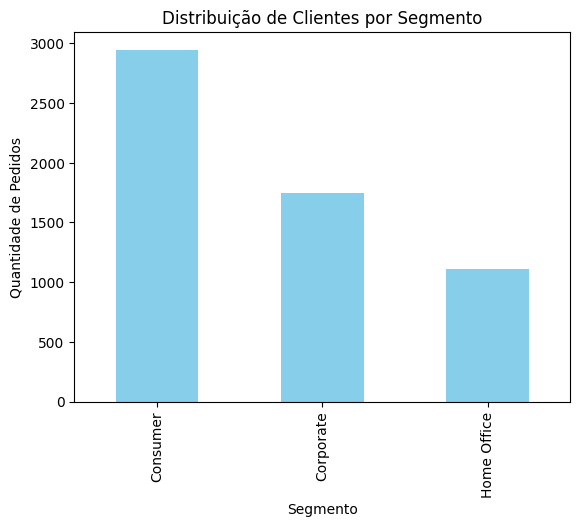

In [5]:
# Distribuição por segmento
df["SEGMENTO_CLIENTE"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribuição de Clientes por Segmento")
plt.xlabel("Segmento")
plt.ylabel("Quantidade de Pedidos")
plt.show()

## Etapa 6 – Produtos Mais Vendidos

Visualizamos as subcategorias com mais vendas.

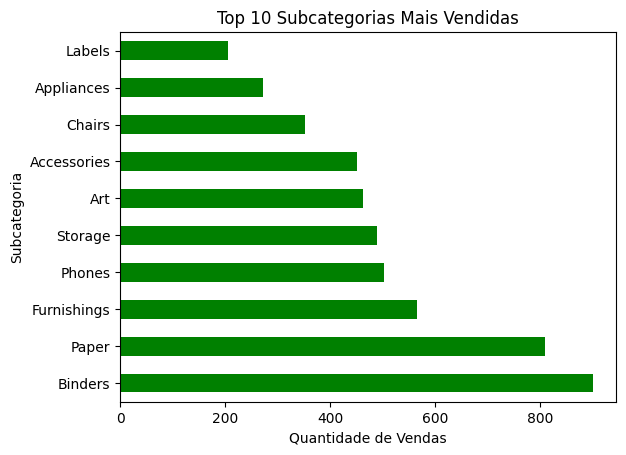

In [6]:
df["SUB_CATEGORIA_PRODUTO"].value_counts().head(10).plot(kind="barh", color="green")
plt.title("Top 10 Subcategorias Mais Vendidas")
plt.xlabel("Quantidade de Vendas")
plt.ylabel("Subcategoria")
plt.show()

## Etapa 7 – Lucro por Categoria e Região

Investigamos onde estão os maiores lucros da empresa.

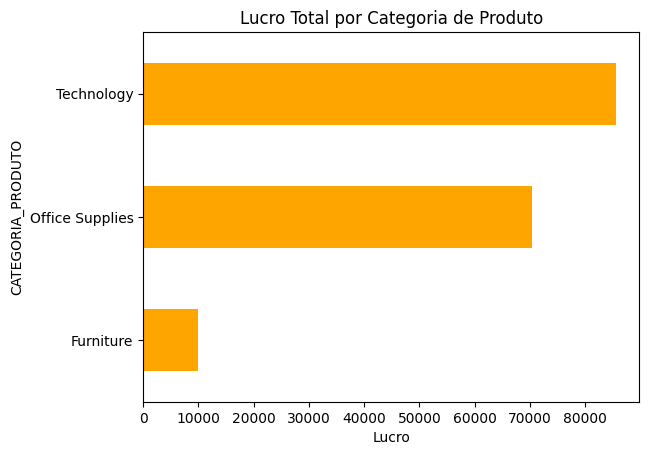

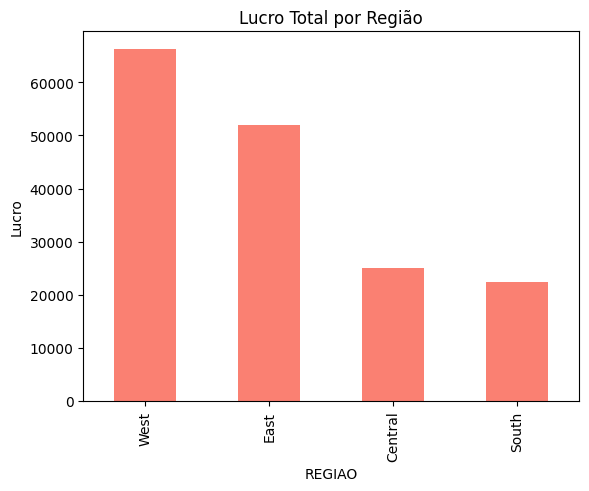

In [7]:
# Lucro por categoria
df.groupby("CATEGORIA_PRODUTO")["LUCRO"].sum().sort_values().plot(kind="barh", color="orange")
plt.title("Lucro Total por Categoria de Produto")
plt.xlabel("Lucro")
plt.show()

# Lucro por região
df.groupby("REGIAO")["LUCRO"].sum().sort_values(ascending=False).plot(kind="bar", color="salmon")
plt.title("Lucro Total por Região")
plt.ylabel("Lucro")
plt.show()

## Etapa 8 – Análise de Devoluções

Analisamos como o tipo de entrega e pagamento afetam a taxa de devoluções.

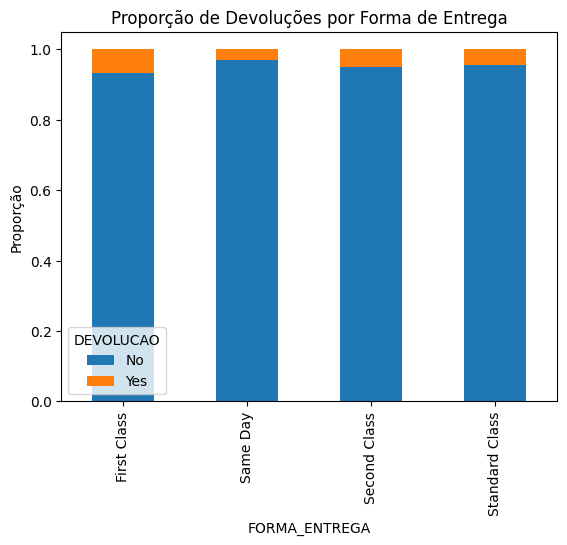

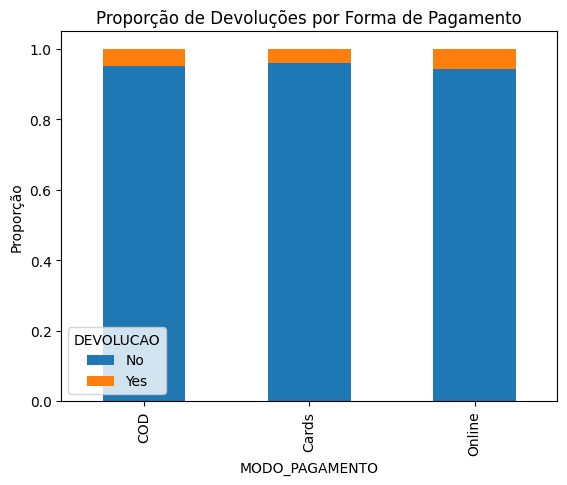

In [9]:
# Proporção de devoluções por entrega
df.groupby("FORMA_ENTREGA")["DEVOLUCAO"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)
plt.title("Proporção de Devoluções por Forma de Entrega")
plt.ylabel("Proporção")
plt.show()

# Proporção por forma de pagamento
df.groupby("MODO_PAGAMENTO")["DEVOLUCAO"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)
plt.title("Proporção de Devoluções por Forma de Pagamento")
plt.ylabel("Proporção")
plt.show()

## Etapa 9 – Lucro por Forma de Pagamento e por Segmento

Avaliamos o lucro médio por método de pagamento e por tipo de cliente.

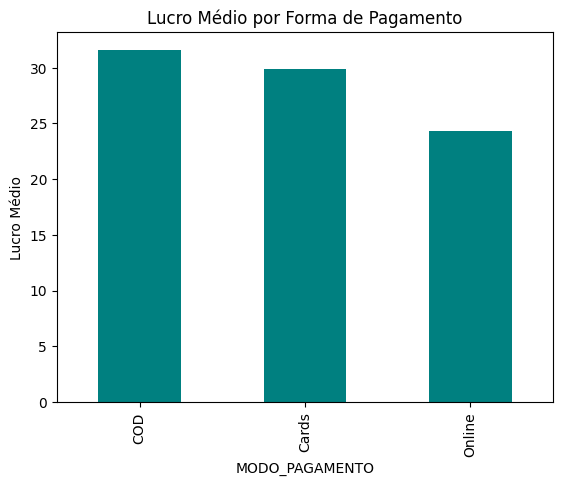

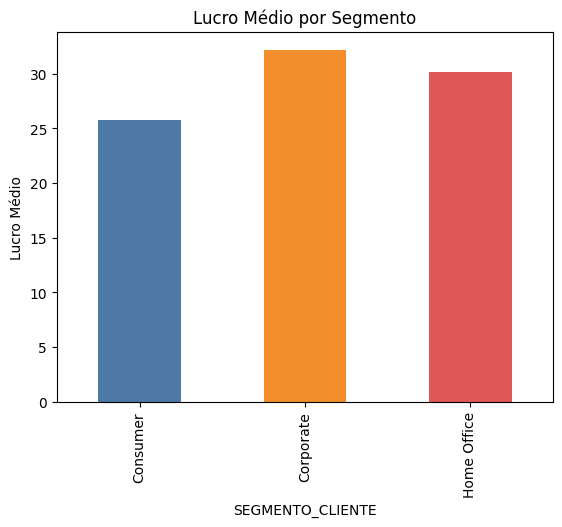

In [10]:
# Lucro médio por forma de pagamento
df.groupby("MODO_PAGAMENTO")["LUCRO"].mean().plot(kind="bar", color="teal")
plt.title("Lucro Médio por Forma de Pagamento")
plt.ylabel("Lucro Médio")
plt.show()

# Lucro médio por segmento
df.groupby("SEGMENTO_CLIENTE")["LUCRO"].mean().plot(kind="bar", color=["#4e79a7", "#f28e2b", "#e15759"])
plt.title("Lucro Médio por Segmento")
plt.ylabel("Lucro Médio")
plt.show()

## Etapa 10 – Análise Temporal e Sazonalidade

Verificamos a distribuição de vendas por mês.

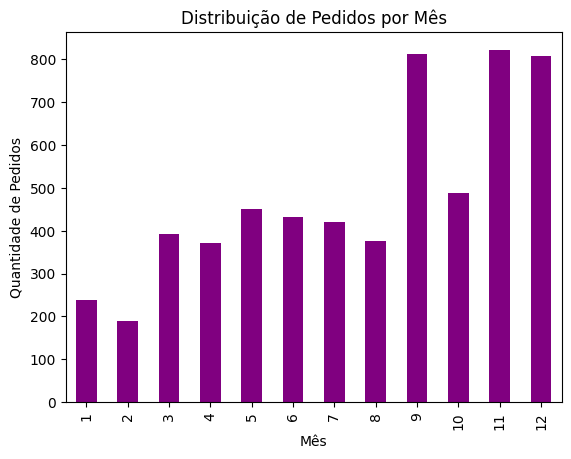

In [11]:
df["MES"] = df["DATA_PEDIDO"].dt.month
df["MES"].value_counts().sort_index().plot(kind="bar", color="purple")
plt.title("Distribuição de Pedidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Pedidos")
plt.show()

## Etapa 11 – Correlação entre Variáveis

Visualizamos um mapa de calor com as principais variáveis numéricas.

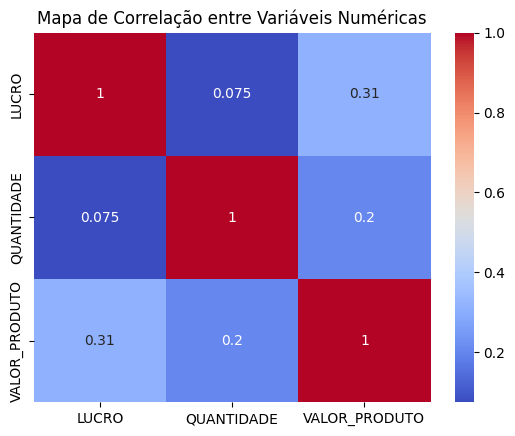

In [12]:
sns.heatmap(df[["LUCRO", "QUANTIDADE", "VALOR_PRODUTO"]].corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()

## Etapa 12 – Conclusão

- O segmento **Consumer** é o mais frequente e também o mais lucrativo.
- A categoria **Technology** lidera o lucro, especialmente na região **West**.
- A forma de entrega **Standard Class** apresenta mais devoluções.
- O método de pagamento **Cartão de Crédito** oferece maior lucro médio.

### Recomendações:

1. Aumentar o foco em produtos de tecnologia, especialmente **Copiers**.
2. Reavaliar logística da entrega Standard.
3. Incentivar formas de pagamento mais lucrativas.